# Importing necessary libraries

In [1]:
import os
import pandas as pd
import numpy as np
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
np.random.seed(123)



# Unzipping the data file

In [2]:
# Unzip data file
zip_ref = ZipFile('archive.zip', 'r')
zip_ref.extractall()
zip_ref.close()


# Loading the dataset and displaying the first few rows

In [3]:
df = pd.read_csv('smoke_detection_iot.csv')
df.head()


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Defining features and target variable

In [4]:
features = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']
target = ["Fire Alarm"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=None)

# Training a Decision Tree Classifier

In [5]:
clf = DecisionTreeClassifier()
# Example: setting max depth and minimum samples split
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)



# Calculating and printing the accuracy of the model

In [6]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(accuracy*100, 3)}%')

Accuracy: 98.898%


# Creating a confusion matrix and visualizing it as a heatmap

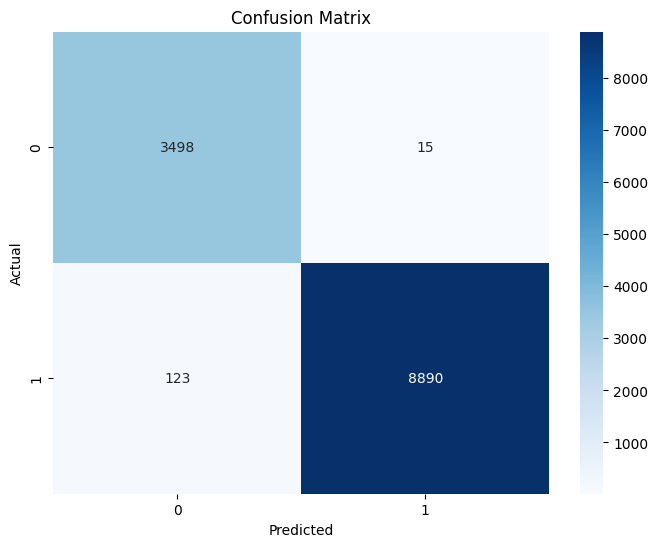

In [7]:
conf_mat = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()